## 💻 시각화
- bar graph : 2018,2019년 대비 2020, 2021년 "소프트웨어 업종" 상장된 법인 수
- line graph : 2018, 2019년 대비 2020, 2021년 코스피지수

### (1) 데이터 전처리-코스피지수

In [1]:
import pandas as pd
import numpy as np

#코스피지수 파일
kospi=pd.read_csv("result_year.csv")[['날짜', '종가']]
#컬럼명 변경
kospi.columns=['날짜', '코스피']

-> 코스피지수는 종가를 주로 시각화 / "날짜", "종가" 컬럼만 가져옴

In [2]:
#데이터 타입 확인
kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      6 non-null      object 
 1   코스피     6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 224.0+ bytes


-> 날짜가 object 타입이면 년도만 뽑아오기 어렵기 때문에 datetime으로 데이터타입을 변경해줘야함

In [3]:
#날짜컬럼을 타입을 object->datetime으로 변경
import datetime
kospi['날짜']=pd.to_datetime(kospi['날짜'])

#날짜에서 년도만 가져옴
kospi['날짜'] = kospi['날짜'].dt.strftime("%Y")

In [4]:
kospi

,날짜,코스피
0,2017,2467.49
1,2018,2041.04
2,2019,2197.67
3,2020,2873.47
4,2021,2977.65
5,2022,2236.40


-> 년도만 남긴 것을 확인

- 데이터프레임명.iloc[행 범위 지정, 열 범위 지정]

-> 2017년이 0행이 되는것이구요 1:5으로 지정해주었다면 1행~4행(5-1=4)까지 2018-2021년이 출력이 됩니다. 1:6으로 지정해주었다면 1행-5행(6-1=5)까지 2018년-2022년이 출력이 됩니다. 

-> ":"는 전부다 가져오라는 것을 의미합니다

In [5]:
# 분석을 위해 18~21년도만 데이터프레임에 남김
kospi=kospi.iloc[1:5, :]

### (2) 데이터 전처리-업종별 상장일

In [6]:
#업종별 상장일 데이터
fund=pd.read_csv("fund1.csv")
fund.head(5)

,업종,상장일
0,마그네틱 및 광학 매체 제조업,2022-12-29
1,의료용 기기 제조업,2022-12-28
2,전자부품 제조업,2022-12-28
3,금융 지원 서비스업,2022-12-27
4,1차 철강 제조업,2022-12-23


-> 시각화를 위해 업종 중 "소프트웨어  개발 및 공급업" 컬럼만 남기겠습니다!

In [7]:
fund=fund[fund['업종']=='소프트웨어  개발 및 공급업']

-> 데이터프레임명[데이터프레임명['컬럼명']=='조건입력']을 해주면 원하는 행만 확인해볼 수 있음

In [8]:
fund.head(4)

,업종,상장일
25,소프트웨어 개발 및 공급업,2022-11-18
26,소프트웨어 개발 및 공급업,2022-11-17
39,소프트웨어 개발 및 공급업,2022-10-27
44,소프트웨어 개발 및 공급업,2022-10-20


In [9]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 25 to 600
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   업종      63 non-null     object
 1   상장일     63 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


-> 상장일 데이터 타입이 object이므로 datetime으로 변경 후 년도만 가져옴

In [10]:
fund['상장일']=pd.to_datetime(fund['상장일'])

#날짜에서 년도만 가져옴
fund['상장일'] = fund['상장일'].dt.strftime("%Y")

In [11]:
fund.head(5)

,업종,상장일
25,소프트웨어 개발 및 공급업,2022
26,소프트웨어 개발 및 공급업,2022
39,소프트웨어 개발 및 공급업,2022
44,소프트웨어 개발 및 공급업,2022
53,소프트웨어 개발 및 공급업,2022


-> 년도만 남긴 것을 확인

### 데이터프레임을 년도별 상장된 소프트웨어 기업 개수로 변경

- value_counts()함수 사용

In [12]:
fund=pd.DataFrame(fund['상장일'].value_counts()).sort_index()

#컬럼명 변경
fund.columns=['상장개수']

-> value_counts()함수를 사용하면 년도별로 몇개의 행이 있는지 count해줍니다.

-> sort_index()함수를 사용해서 년도를 오름차순으로 정렬해주었습니다.

In [13]:
# 2022년은 제외하고 분석 진행
# 4번째 행까지만 저장
fund=fund.iloc[:4, :]

In [14]:
fund

,상장개수
2018,6
2019,13
2020,7
2021,26


### (3) 시각화-kospi&fund 데이터프레임

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#경고무시
import warnings
warnings.filterwarnings('ignore')
# 한글처리
plt.rc('font', family='Malgun Gothic')
# '-' 문자 처리
plt.rc('axes', unicode_minus=False)

In [16]:
#시각화를 위해 리스트 형식으로 변경
year=list(kospi.날짜)
kospi_=list(kospi.코스피)
count=list(fund.상장개수)

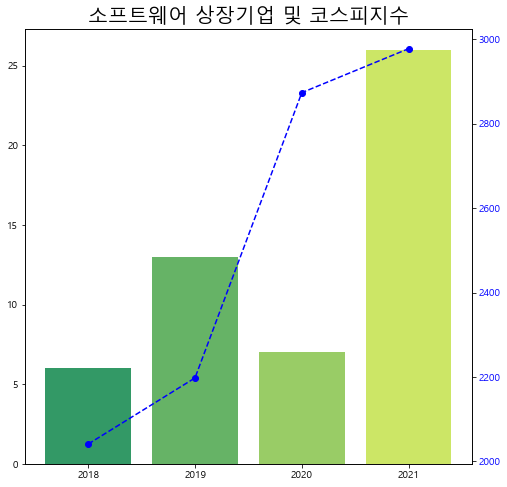

In [17]:
fig = plt.figure(figsize=(8,8)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
ax1 = fig.add_subplot() ## axes 생성


#X축 지정
xtick_label = list(range(len(year))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label) ## x축 눈금 
ax1.set_xticklabels(year) ## x축 눈금 라벨


#bar차트(년도별 상장된 소프트웨어기업 개수)
colors = sns.color_palette('summer', len(year)) ## 바 차트 색상
ax1.bar(xtick_label, count, color=colors) ## 바차트 출력


#line차트(년도별 코스피지수)
color = 'blue'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label, kospi_, color=color, linestyle='--', marker='o') ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정
 

#그래프 title 지정    
plt.title('소프트웨어 상장기업 및 코스피지수', fontsize=20)


#show
plt.show()